**Name: Zhi Li**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

In [20]:
# import data
fall= pd.read_csv('KAEFS_IRGAONS_Flux_Fall.csv', skiprows=[1])
summer= pd.read_csv('KAEFS_IRGAONS_Flux_Summer.csv', skiprows=[1])
variable= pd.read_excel('Variable_Names.xlsx')
fall.set_index('TIMESTAMP', inplace= True)
summer.set_index('TIMESTAMP', inplace= True)
fall.index= pd.to_datetime(fall.index, format= '%m/%d/%y %H:%M')
summer.index= pd.to_datetime(summer.index, format= '%m/%d/%y %H:%M')
#description of data
fall.describe()


,LE,H,NETRAD,G,TA_1_1_1,RH_1_1_1,T_DP_1_1_1,amb_e,amb_e_sat,PA,...,Ux,Uy,Uz,T_SONIC,WS_RSLT,WD,WS_MAX,H2O_density,TS_1_1_1,SWC_1_1_1
count,516.000000,520.000000,577.000000,577.000000,577.000000,516.000000,523.000000,523.000000,523.000000,577.000000,...,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,522.000000,577.000000,577.000000
mean,47.419951,23.896798,70.286136,-6.143774,18.870611,73.586705,14.153149,1.716995,2.371862,97.198513,...,-0.472457,0.961968,0.028805,21.902637,2.441847,200.563891,6.370833,12.637065,21.295170,33.915866
std,56.643982,76.174302,157.365253,27.994289,6.091351,12.390473,5.777469,0.574684,0.906565,0.329075,...,1.085032,2.275810,0.084177,6.399887,1.238639,79.572479,2.921311,4.030801,2.850578,4.337205
min,-6.788584,-48.662800,-72.530720,-91.086070,6.680569,40.645450,1.274029,0.673861,0.984235,96.323630,...,-3.860267,-5.664149,-0.239586,8.843258,0.102852,0.155640,0.844037,5.149204,16.516550,26.217800
25%,7.827743,-22.636292,-33.798870,-19.569700,12.755970,67.376312,8.638206,1.124872,1.469988,96.975280,...,-1.188173,-0.953288,-0.034585,15.071550,1.547258,131.154800,4.224442,8.531934,18.173950,29.584500
50%,20.541990,-5.640274,-2.402408,-11.994770,18.789090,76.053230,17.717770,2.035683,2.436760,97.234000,...,-0.533794,1.195430,0.044068,23.349580,2.265921,228.725900,6.005274,14.954180,22.074010,35.362300
75%,75.761415,28.493447,100.871800,4.899977,23.454140,82.471390,19.042450,2.212035,2.965805,97.379710,...,0.164253,2.678420,0.088252,26.724990,3.084456,264.658500,8.069814,16.141880,23.442420,36.368800
max,257.126500,347.625900,585.849100,150.141600,31.084670,99.526170,24.101810,3.014526,4.535343,98.143730,...,3.404842,6.223499,0.222261,33.896100,6.287497,359.183700,17.179010,22.340660,26.468720,41.909600


#### Q1. Plot the available observations of the Surface Energy Budget (LE = Latent Heat Flux, H = Sensible Heat Flux, G = Ground Heat Flux, NETRAD = Net Radiation) as a time series for each of the two periods.  Omit any missing data. (10 points)

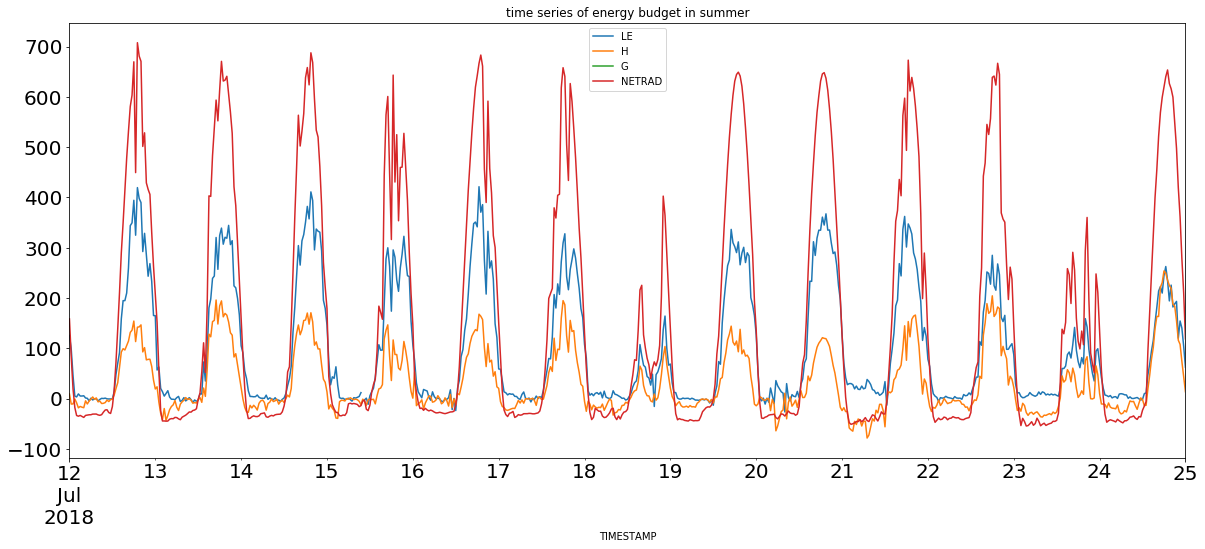

In [21]:
sel_col= ['LE', 'H', 'G', 'NETRAD']
summer[sel_col].plot(figsize=(20,8), title='time series of energy budget in summer', fontsize=20);

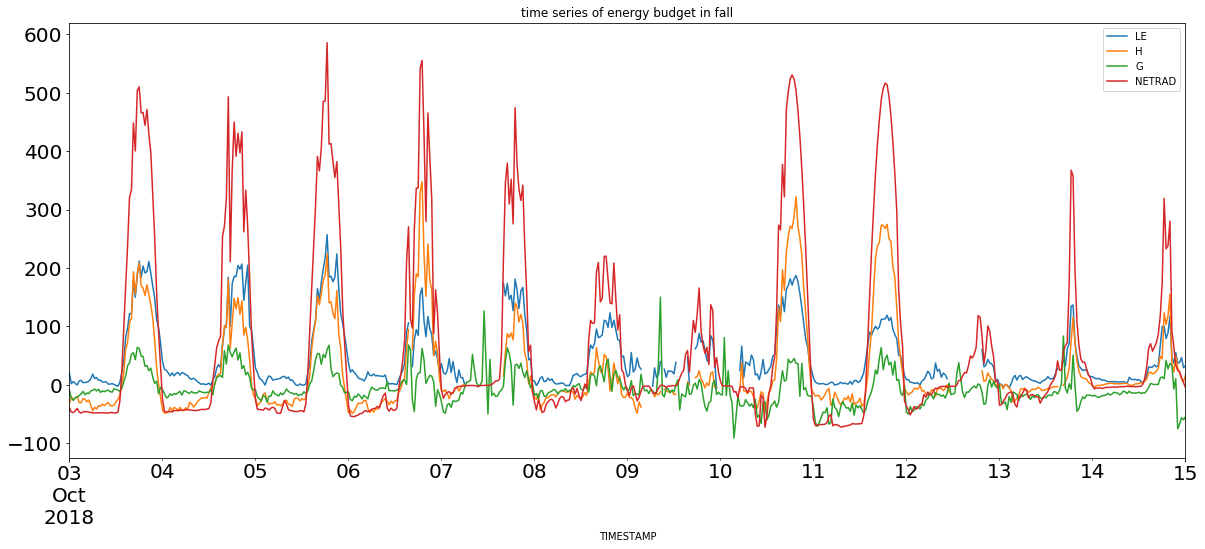

In [22]:
fall[sel_col].plot(figsize=(20,8), title='time series of energy budget in fall', fontsize=20);

#### Q2. For each period, estimate and plot the daily Evapotranspiration by summing the 30 minute values for latent heat flux into a daily total and then converting to ET using the Latent Heat of Vaporization and the density of water. (10 points)

Look up a table, showing latent heat of evaporation is 2256 kJ/kg.

_Source: engineeringtoolbox.com/fluids-evaporation-latent-heat-d_147.html

According to the equation:

$$LE=E \rho_w L_w$$
$$E=\frac{LE}{\rho_w L_w}$$

where:  
E: evaporation  ($m/day$)  
      LE: latent heat  ($W/m^2$)  
      $L_w$: latent heat of evaporation  (kJ/kg)  
      $\rho_w$: density of water  ($10^3 kg/m^3$)

In [23]:
daily_fall= fall.resample('D').agg(sum)
daily_sum= summer.resample('D').agg(sum)

daily_fall['ET']= daily_fall['LE']/ 2256. / 1e3*3.6*24
daily_sum['ET']= daily_sum['LE']/ 2256./1e3*3.6*24

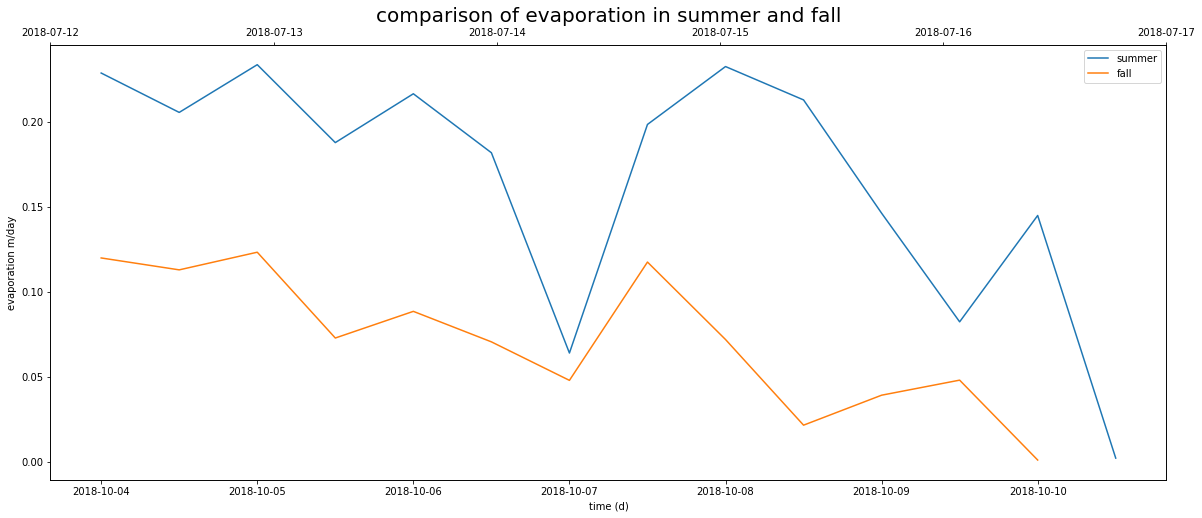

In [24]:
fig= plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(daily_sum)), daily_sum.ET, label='summer')
ax1.plot(range(len(daily_fall)), daily_fall.ET, label='fall')
ax1.set_title('comparison of evaporation in summer and fall', fontsize= 20)
ax1.set_ylabel('evaporation m/day')
ax1.set_xlabel('time (d)')
ax1.set_xticklabels(daily_fall.index.date)
ax1.legend()
ax2= ax1.twiny()
ax2.set_xticklabels(daily_sum.index.date)
plt.show()

#### Q4. Estimate and plot the daily values of mean Bowen Ratio.  Use only values of LE and H when Net Radiation exceeds 100 W m-2. (10 points)

Bowen ratio is defined as follow:
$$B=\frac{H}{LE}$$
where:  
H: sensible heat  
LE: latent heat  

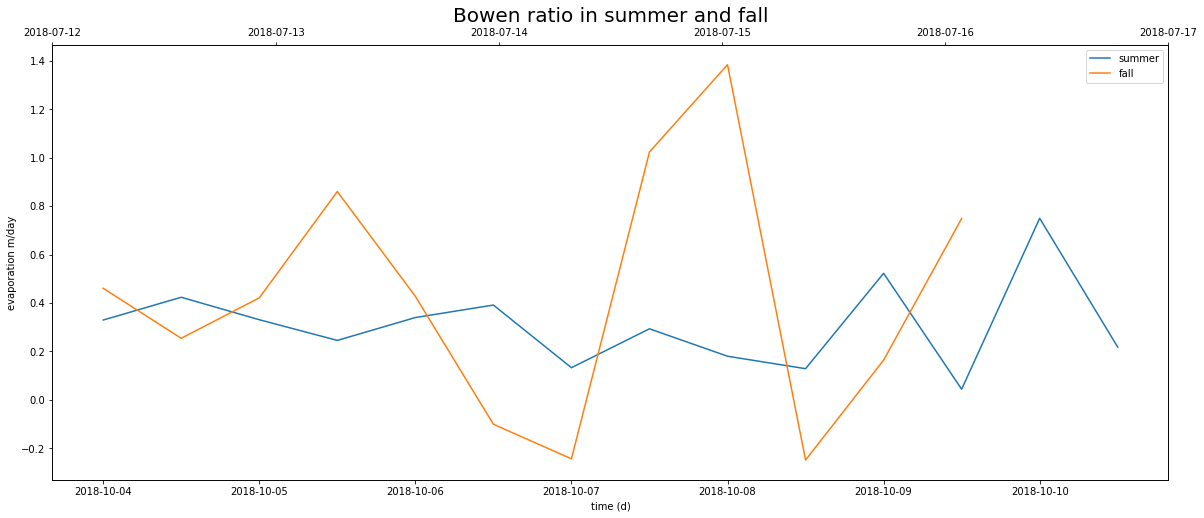

In [25]:
daily_sum['Bowen']= daily_sum.apply(lambda x: x.H/x.LE if x.NETRAD>100 else np.nan, axis=1)
daily_fall['Bowen']= daily_fall.apply(lambda x: x.H/x.LE if x.NETRAD>100 else np.nan, axis=1)

fig= plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(daily_sum)), daily_sum.Bowen, label='summer')
ax1.plot(range(len(daily_fall)), daily_fall.Bowen, label='fall')
ax1.set_title('Bowen ratio in summer and fall', fontsize= 20)
ax1.set_ylabel('evaporation m/day')
ax1.set_xlabel('time (d)')
ax1.set_xticklabels(daily_fall.index.date)
ax1.legend()
ax2= ax1.twiny()
ax2.set_xticklabels(daily_sum.index.date)
plt.show()

#### Q4 Estimate and plot the daily values of the mean Evaporative Fraction.  Use only values of LE and H when Net Radiation exceeds 100 W m-2. (10 points)

Evaporative fraction is defined as follows:

$$EF=\frac{H}{H+LE}=\frac{1}{1+B}$$

where:  
B: Bowen ratio

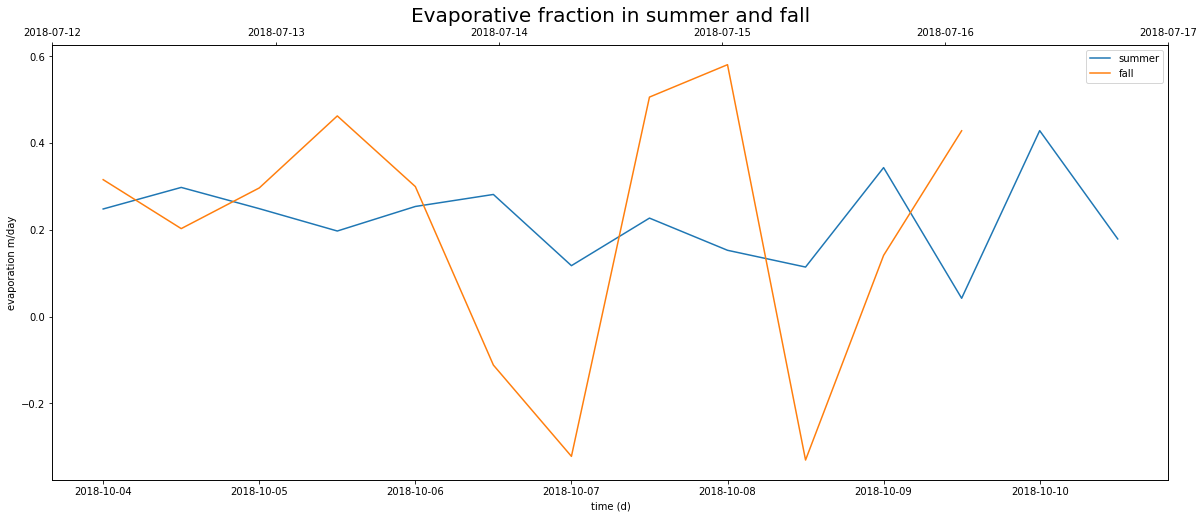

In [26]:
daily_sum['EF']= daily_sum.apply(lambda x: x.H/(x.LE+x.H) if x.NETRAD>100 else np.nan, axis=1)
daily_fall['EF']= daily_fall.apply(lambda x: x.H/(x.LE+x.H) if x.NETRAD>100 else np.nan, axis=1)

fig= plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(daily_sum)), daily_sum.EF, label='summer')
ax1.plot(range(len(daily_fall)), daily_fall.EF, label='fall')
ax1.set_title('Evaporative fraction in summer and fall', fontsize= 20)
ax1.set_ylabel('evaporation m/day')
ax1.set_xlabel('time (d)')
ax1.set_xticklabels(daily_fall.index.date)
ax1.legend()
ax2= ax1.twiny()
ax2.set_xticklabels(daily_sum.index.date)
plt.show()

#### Q5 Examine the results for parts 1-4 and provide a summary thats compares/contrast between the time periods.  Are there any differences in the surface energy budget, ET, Bowen Ratio, and Evaporative Fraction?  What may be causing any variability both within period and between the two periods. (10 points)

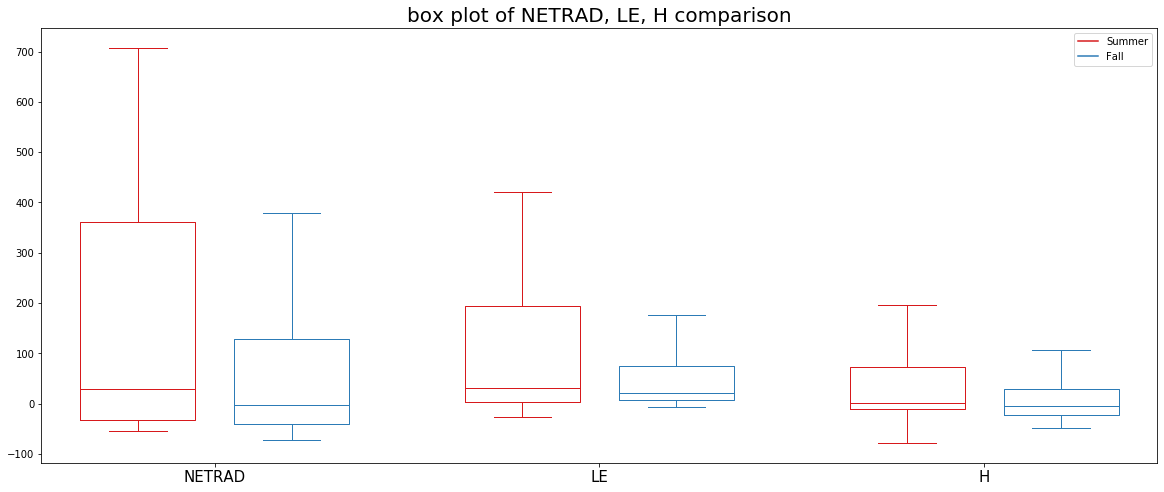

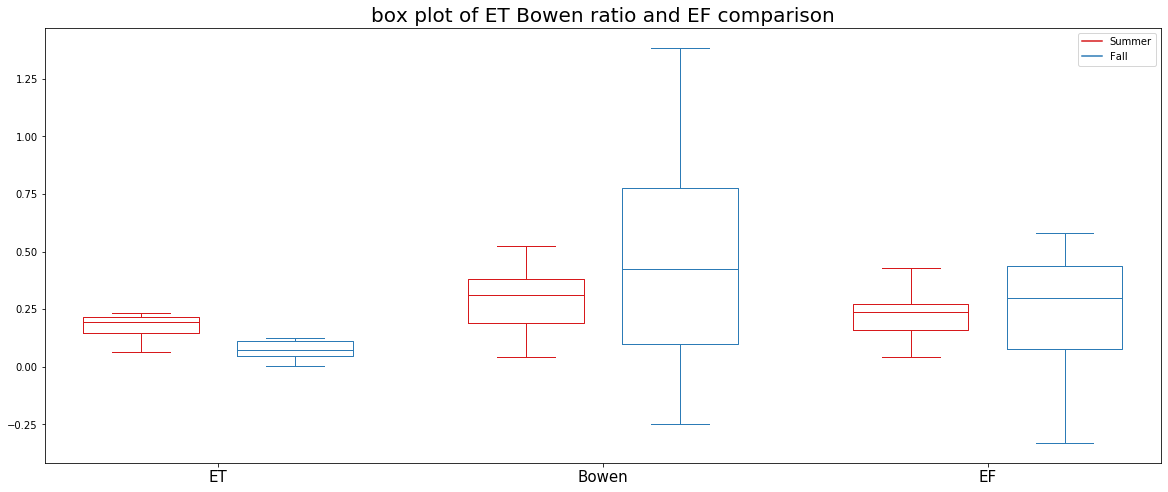

In [27]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
selectColRad= ['NETRAD', 'LE', 'H']
data_nonan_summer= summer[selectColRad].dropna()
data_nonan_fall= fall[selectColRad].dropna()
dataA= [data_nonan_summer[col].values for col in selectColRad]
dataB= [data_nonan_fall[col].values for col in selectColRad]
plt.figure(figsize=(20,8))
bxl= plt.boxplot(dataA, positions= np.array(range(len(selectColRad)))*2-0.4,sym='', widths=0.6);
bxr= plt.boxplot(dataB, positions= np.array(range(len(selectColRad)))*2+0.4,sym='', widths=0.6);
set_box_color(bxl, '#D7191C')
set_box_color(bxr, '#2C7BB6')
plt.plot([], c='#D7191C', label='Summer')
plt.plot([], c='#2C7BB6', label='Fall')
plt.legend()
plt.xticks(range(0, len(selectColRad) * 2, 2), selectColRad, fontsize=15)
plt.title('box plot of NETRAD, LE, H comparison', fontsize=20)
plt.show()

selectColRat= ['ET', 'Bowen', 'EF']
dataC= [daily_sum[col].values for col in selectColRat]
dataD= [daily_fall[col].dropna().values for col in selectColRat]
plt.figure(figsize=(20,8))
bxl_2= plt.boxplot(dataC, positions= np.array(range(len(selectColRat)))*2-0.4,sym='', widths=0.6);
bxr_2= plt.boxplot(dataD, positions= np.array(range(len(selectColRat)))*2+0.4,sym='', widths=0.6);
set_box_color(bxl_2, '#D7191C')
set_box_color(bxr_2, '#2C7BB6')
plt.plot([], c='#D7191C', label='Summer')
plt.plot([], c='#2C7BB6', label='Fall')
plt.legend()
plt.xticks(range(0, len(selectColRat) * 2, 2), selectColRat, fontsize=15)
plt.title('box plot of ET Bowen ratio and EF comparison', fontsize=20)
plt.show()

According to the time series plot at the very beginning, it illustrates daily variability of net radiation, latent heat, sensible heat and ground heat flux, net radiation reaches the maximum at noon and drops to even below 0 at nigh, latent heat, sensible heat follow the same trend because the solar radiation has diurnal variability.

Comparing seasonal variability as the box plot shows, expectedly, net radiation is larger in summer than fall because this place receives more radiation, and also for latent heat and sensible heat. Evaporation also depends on latent heat, so summer gets more water evaporated than fall. Fall tends to get more variant bowen ratio and higher mean, which suggests more radiation is transferred to sensible heat instead of latent heat in fall. In terms of evaporative fraction, fall has a divergent evaporation efficiency that is mainly dependent on the weather, while in summer, the contribution of latent heat is more stable. Again, fall has higher mean of evaporative fraction, meaning higher efficiency in evaporating water.

# Part 2

#### Q1. You will need the file titled “Nebraska_FiguresPreview the document” for this question. Net radiation, as well as latent and sensible heat flux are plotted on all four figures. These fluxes were measured for two different locations in close proximity to one another during the summers of 2006 and 2007. Nebraska was experiencing drought during the period shown in 2006, but not during this period in 2007. One of these locations is irrigated, while the other is not. You can assume the crop type is the same so the main difference is whether the field is irrigated or not. Your task is to determine whether location A or location B is the irrigated crop, and to provide a brief justification for why you chose this location. (3 pts. Location, 12 pts. Explanation)

From four graphs provided, site B is more likely to be irrigated because, firstly, irrigated places tend to have higher latent heat as water is evaporated more than non-irrigated place, and secondly, since it is mentioned that Nebraska was experiencing drought in 2006, site A shows clearly that crop gets drier compared to 2007, which supports that this region is not irrigated, otherwise it should not show much difference. 

#### Q2 Use the file titled “OH_versus_FL_figuresPreview the document” to answer this question. Similar to the previous question, net radiation, as well as latent and sensible heat flux are plotted on all four figures. This time, each location has one plot for summer, and one for winter. From this information, determine which location is in Florida, and which is in Ohio. As in the previous question, provide a brief justification for your choice. (3 pts. Location, 12 pts. Explanation)

<img src='position.png' width="30%">

according to the relative position of Ohio and Florida, Florida is way south than Ohio, and expected to receive more radiation in summer and winter if on a bird's eye view. Refering to the graph, location B is clearly receiving more net radiation in both summer and winter. Thus, B is more likely to be in Florida and A is in Ohio.